In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
train = pd.read_csv("/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Train.csv")
test = pd.read_csv('/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/Test.csv')
submission = pd.read_csv('/content/drive/My Drive/DSN AI Bootcamp Qualification Hackathon/submission.csv')
##train = pd.read_csv("Train.csv")
##test = pd.read_csv('Test.csv')
#submission = pd.read_csv('SampleSubmission.csv')

In [4]:
#train.info()

In [7]:
train.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [8]:
#train.isnull().sum()/len(train) * 100

In [9]:
new_train = train.drop(columns=['form_field31','form_field40','form_field41'])
#new_train = train
print(new_train.head())

    Applicant_ID  form_field1  ...  form_field50  default_status
0  Apcnt_1000000       3436.0  ...      0.044335              no
1  Apcnt_1000004       3456.0  ...      0.322436              no
2  Apcnt_1000008       3276.0  ...      0.011640             yes
3  Apcnt_1000012       3372.0  ...      0.082729              no
4  Apcnt_1000016       3370.0  ...      0.045630              no

[5 rows x 49 columns]


In [10]:
#test.isnull().sum()/len(test) * 100

In [11]:
new_test = test.drop(columns=['form_field31','form_field40','form_field41'])
#new_test = test

In [12]:
new_train.fillna(new_train.median(), inplace=True)

In [13]:
new_test.fillna(new_test.median(), inplace=True)

In [14]:
X = new_train.drop(['default_status','Applicant_ID'], axis=1)
y =new_train.default_status

In [15]:
y_ = pd.get_dummies(y)

In [16]:
X.form_field47.value_counts()

charge     36373
lending    19627
Name: form_field47, dtype: int64

In [17]:
X_ = pd.get_dummies(X)
test_ = pd.get_dummies(new_test.drop('Applicant_ID', axis=1))

In [16]:
test_.shape

(24000, 48)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
minmax = MinMaxScaler()

In [20]:
X_scaled = minmax.fit_transform(X_)
test_sc = minmax.fit_transform(test_)

In [21]:
pip install --quiet catboost

     |████████████████████████████████| 66.1MB 42kB/s 


In [22]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier

In [23]:
from lightgbm import LGBMClassifier

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

In [25]:
cat = CatBoostClassifier()
xgb = XGBClassifier()
lgb = LGBMClassifier()
ada = AdaBoostClassifier()
rf = RandomForestClassifier()
lr = LogisticRegression()

In [26]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV, cross_val_score

In [27]:
from sklearn.metrics import roc_auc_score

In [ ]:
Applied

## Applied Kfold CV

In [28]:
kf = KFold(n_splits=5)
cat = CatBoostClassifier(task_type='GPU')


In [29]:
X_scaled1 = pd.DataFrame(X_scaled)

In [30]:
roc_score = []
test_pred = []

for train_index, test_index in kf.split(X_scaled1,y):
    x_train, x_test = X_scaled1.iloc[train_index],X_scaled1.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    
    model = cat.fit(x_train, y_train)
    y_pred = model.predict_proba(x_test)[:,1]
    score = roc_auc_score(y_test,y_pred)
    pred = model.predict_proba(test_sc)[:,1]
    roc_score.append(score)
    test_pred.append(pred)
  #save result to list

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6035519	total: 354ms	remaining: 58.6s
6:	learn: 0.5916783	total: 410ms	remaining: 58.1s
7:	learn: 0.5813988	total: 461ms	remaining: 57.2s
8:	learn: 0.5712466	total: 516ms	remaining: 56.8s
9:	learn: 0.5624263	total: 569ms	remaining: 56.3s
10:	learn: 0.5543641	total: 621ms	remaining: 55.8s
11:	learn: 0.5464954	total: 673ms	remaining: 55.4s
12:	learn: 0.5390463	total: 728ms	remaining: 55.3s
13:	learn: 0.5320737	total: 783ms	remaining: 55.1s
14:	learn: 0.5258647	total: 836ms	remaining: 54.9s
15:	learn: 0.5208337	total: 888ms	remaining: 54.6s
16:	learn: 0.5159658	total: 925ms	remaining: 53.5s
17:	learn: 0.5107802	total: 980ms	remaining: 53.5s
18:	learn: 0.5061227	total: 1.03s	remaining: 53.3s
19:	learn: 0.5013807	total: 1.08s	remaining: 53.2s
20:	learn: 0.4971843	total: 1.14s	remaining: 53.1s
21:	learn: 0.4933320	total: 1.2s	remaining: 53.5s
22:	learn: 0.4891186	total: 1.26s	remaining: 53.7s
23:	learn: 0.4856638	total: 1.32s	rem

In [31]:
np.mean(roc_score)

0.8378690794511068

In [32]:
#prediction = gscv.predict_proba(test_sc)[:,1]

submission['default_status']= np.mean(test_pred, axis=0)
submission.to_csv('sub3.csv', index=False)

In [51]:
grid = {'learning_rate': [ 0.05],}
        #'n_estimators': [300, 500] }
       # 'depth': [4,6],}
        #'l2_leaf_reg': [3, 5]}

"""grid_search_result = cat.grid_search(grid, 
                                       X=X_train, 
                                       y=y_train, 
                                       plot=True)"""

'grid_search_result = cat.grid_search(grid, \n                                       X=X_train, \n                                       y=y_train, \n                                       plot=True)'

In [52]:
cat = CatBoostClassifier(task_type='GPU', depth=7, n_estimators=1500, early_stopping_rounds=50)


gscv = GridSearchCV(cat, param_grid=grid)

Tried GridSearch CV

In [53]:
gscv.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
1001:	learn: 0.3455363	total: 1m 13s	remaining: 36.8s
1002:	learn: 0.3455340	total: 1m 14s	remaining: 36.7s
1003:	learn: 0.3455331	total: 1m 14s	remaining: 36.6s
1004:	learn: 0.3454777	total: 1m 14s	remaining: 36.5s
1005:	learn: 0.3453477	total: 1m 14s	remaining: 36.5s
1006:	learn: 0.3452694	total: 1m 14s	remaining: 36.4s
1007:	learn: 0.3452251	total: 1m 14s	remaining: 36.3s
1008:	learn: 0.3451506	total: 1m 14s	remaining: 36.3s
1009:	learn: 0.3450727	total: 1m 14s	remaining: 36.2s
1010:	learn: 0.3449924	total: 1m 14s	remaining: 36.1s
1011:	learn: 0.3449101	total: 1m 14s	remaining: 36s
1012:	learn: 0.3448379	total: 1m 14s	remaining: 36s
1013:	learn: 0.3448257	total: 1m 14s	remaining: 35.9s
1014:	learn: 0.3447726	total: 1m 14s	remaining: 35.8s
1015:	learn: 0.3447058	total: 1m 15s	remaining: 35.7s
1016:	learn: 0.3446697	total: 1m 15s	remaining: 35.7s
1017:	learn: 0.3446037	total: 1m 15s	remaining: 35.6s
1018:	learn: 0.3445423	total: 1m 15

GridSearchCV(cv=None, error_score=nan,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f2c98b43c50>,
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.05]}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [1]:
gscv_pred = gscv.predict_proba(X_test)[:,1]
roc_auc_score(y_test, gscv_pred)


NameError: ignored

In [49]:
\\prediction = gscv.predict_proba(test_sc)[:,1]

submission['default_status']=prediction
submission.to_csv('submission4.csv', index=False)


In [40]:
cat = CatBoostClassifier(task_type='GPU', learning_rate=0.03, depth=4, n_estimators=3000, early_stopping_rounds=50)

cat.fit(X_train, y_train, eval_set=(X_test, y_test))

0:	learn: 0.6755768	test: 0.6755778	best: 0.6755778 (0)	total: 41.3ms	remaining: 2m 3s
1:	learn: 0.6598424	test: 0.6598027	best: 0.6598027 (1)	total: 81.1ms	remaining: 2m 1s
2:	learn: 0.6447245	test: 0.6446863	best: 0.6446863 (2)	total: 120ms	remaining: 1m 59s
3:	learn: 0.6310415	test: 0.6311009	best: 0.6311009 (3)	total: 159ms	remaining: 1m 59s
4:	learn: 0.6172351	test: 0.6172512	best: 0.6172512 (4)	total: 194ms	remaining: 1m 56s
5:	learn: 0.6041707	test: 0.6041966	best: 0.6041966 (5)	total: 232ms	remaining: 1m 55s
6:	learn: 0.5926745	test: 0.5926365	best: 0.5926365 (6)	total: 270ms	remaining: 1m 55s
7:	learn: 0.5816370	test: 0.5816835	best: 0.5816835 (7)	total: 305ms	remaining: 1m 53s
8:	learn: 0.5725527	test: 0.5725472	best: 0.5725472 (8)	total: 347ms	remaining: 1m 55s
9:	learn: 0.5629523	test: 0.5629325	best: 0.5629325 (9)	total: 379ms	remaining: 1m 53s
10:	learn: 0.5551646	test: 0.5551327	best: 0.5551327 (10)	total: 409ms	remaining: 1m 51s
11:	learn: 0.5477324	test: 0.5477070	best

In [33]:
from sklearn.metrics import roc_auc_score, log_loss

In [41]:
pred = cat.predict_proba(X_test)[:,1]

In [42]:
roc_auc_score(y_test, pred)


0.8431831446345349

In [38]:
roc_auc_score(y_test, pred)


0.8384106149825902

In [35]:
roc_auc_score(y_test, pred)

0.8439191274975535

In [ ]:
models = [cat, xgb, lgb, ada, rf, lr]

for model in models:
    model.fit(X_train, y_train)
    pred = model.predict_proba(X_test)[:,1]
    score = roc_auc_score(y_test,pred)
    print(f'the auc score for {model} is {score}')

Learning rate set to 0.052243
0:	learn: 0.6612610	total: 81ms	remaining: 1m 20s
1:	learn: 0.6326161	total: 144ms	remaining: 1m 11s
2:	learn: 0.6075513	total: 231ms	remaining: 1m 16s
3:	learn: 0.5858996	total: 314ms	remaining: 1m 18s
4:	learn: 0.5656573	total: 390ms	remaining: 1m 17s
5:	learn: 0.5512728	total: 481ms	remaining: 1m 19s
6:	learn: 0.5376713	total: 567ms	remaining: 1m 20s
7:	learn: 0.5252847	total: 639ms	remaining: 1m 19s
8:	learn: 0.5157513	total: 727ms	remaining: 1m 20s
9:	learn: 0.5056516	total: 821ms	remaining: 1m 21s
10:	learn: 0.4973231	total: 904ms	remaining: 1m 21s
11:	learn: 0.4901760	total: 995ms	remaining: 1m 21s
12:	learn: 0.4841271	total: 1.08s	remaining: 1m 21s
13:	learn: 0.4776950	total: 1.17s	remaining: 1m 22s
14:	learn: 0.4718664	total: 1.26s	remaining: 1m 23s
15:	learn: 0.4671083	total: 1.35s	remaining: 1m 22s
16:	learn: 0.4628994	total: 1.43s	remaining: 1m 22s
17:	learn: 0.4592604	total: 1.52s	remaining: 1m 22s
18:	learn: 0.4555240	total: 1.6s	remaining: 1

157:	learn: 0.3982868	total: 13s	remaining: 1m 9s
158:	learn: 0.3982270	total: 13s	remaining: 1m 8s
159:	learn: 0.3981444	total: 13.1s	remaining: 1m 8s
160:	learn: 0.3980961	total: 13.3s	remaining: 1m 9s
161:	learn: 0.3979804	total: 13.4s	remaining: 1m 9s
162:	learn: 0.3978957	total: 13.5s	remaining: 1m 9s
163:	learn: 0.3977981	total: 13.6s	remaining: 1m 9s
164:	learn: 0.3976612	total: 13.6s	remaining: 1m 9s
165:	learn: 0.3975997	total: 13.7s	remaining: 1m 8s
166:	learn: 0.3974943	total: 13.8s	remaining: 1m 8s
167:	learn: 0.3973885	total: 13.9s	remaining: 1m 8s
168:	learn: 0.3972829	total: 13.9s	remaining: 1m 8s
169:	learn: 0.3971898	total: 14s	remaining: 1m 8s
170:	learn: 0.3970765	total: 14.1s	remaining: 1m 8s
171:	learn: 0.3969383	total: 14.2s	remaining: 1m 8s
172:	learn: 0.3967980	total: 14.3s	remaining: 1m 8s
173:	learn: 0.3966981	total: 14.3s	remaining: 1m 8s
174:	learn: 0.3965721	total: 14.4s	remaining: 1m 7s
175:	learn: 0.3964919	total: 14.5s	remaining: 1m 7s
176:	learn: 0.3963

317:	learn: 0.3816776	total: 26.9s	remaining: 57.7s
318:	learn: 0.3815535	total: 27s	remaining: 57.6s
319:	learn: 0.3814971	total: 27.2s	remaining: 57.7s
320:	learn: 0.3813805	total: 27.3s	remaining: 57.7s
321:	learn: 0.3812853	total: 27.3s	remaining: 57.6s
322:	learn: 0.3811787	total: 27.4s	remaining: 57.5s
323:	learn: 0.3810857	total: 27.5s	remaining: 57.5s
324:	learn: 0.3809904	total: 27.6s	remaining: 57.4s
325:	learn: 0.3808663	total: 27.7s	remaining: 57.3s
326:	learn: 0.3807457	total: 27.8s	remaining: 57.3s
327:	learn: 0.3806376	total: 27.9s	remaining: 57.2s
328:	learn: 0.3805499	total: 28s	remaining: 57.1s
329:	learn: 0.3804199	total: 28.1s	remaining: 57s
330:	learn: 0.3803657	total: 28.2s	remaining: 56.9s
331:	learn: 0.3802391	total: 28.2s	remaining: 56.8s
332:	learn: 0.3801254	total: 28.3s	remaining: 56.7s
333:	learn: 0.3800665	total: 28.4s	remaining: 56.6s
334:	learn: 0.3799573	total: 28.5s	remaining: 56.6s
335:	learn: 0.3798370	total: 28.6s	remaining: 56.5s
336:	learn: 0.3797

476:	learn: 0.3667645	total: 39.2s	remaining: 43s
477:	learn: 0.3666837	total: 39.3s	remaining: 42.9s
478:	learn: 0.3665803	total: 39.3s	remaining: 42.8s
479:	learn: 0.3664697	total: 39.4s	remaining: 42.7s
480:	learn: 0.3663878	total: 39.5s	remaining: 42.6s
481:	learn: 0.3662960	total: 39.5s	remaining: 42.5s
482:	learn: 0.3662008	total: 39.6s	remaining: 42.4s
483:	learn: 0.3660928	total: 39.7s	remaining: 42.3s
484:	learn: 0.3659933	total: 39.8s	remaining: 42.2s
485:	learn: 0.3659176	total: 39.8s	remaining: 42.1s
486:	learn: 0.3657863	total: 39.9s	remaining: 42s
487:	learn: 0.3656937	total: 40s	remaining: 42s
488:	learn: 0.3655834	total: 40.1s	remaining: 41.9s
489:	learn: 0.3654370	total: 40.1s	remaining: 41.8s
490:	learn: 0.3653199	total: 40.2s	remaining: 41.7s
491:	learn: 0.3652472	total: 40.3s	remaining: 41.6s
492:	learn: 0.3651557	total: 40.3s	remaining: 41.5s
493:	learn: 0.3650499	total: 40.4s	remaining: 41.4s
494:	learn: 0.3649542	total: 40.5s	remaining: 41.3s
495:	learn: 0.364885

636:	learn: 0.3526738	total: 54.1s	remaining: 30.8s
637:	learn: 0.3525871	total: 54.2s	remaining: 30.7s
638:	learn: 0.3525133	total: 54.3s	remaining: 30.6s
639:	learn: 0.3524291	total: 54.3s	remaining: 30.6s
640:	learn: 0.3523394	total: 54.4s	remaining: 30.5s
641:	learn: 0.3522592	total: 54.5s	remaining: 30.4s
642:	learn: 0.3521815	total: 54.5s	remaining: 30.3s
643:	learn: 0.3520772	total: 54.6s	remaining: 30.2s
644:	learn: 0.3519708	total: 54.7s	remaining: 30.1s
645:	learn: 0.3518958	total: 54.8s	remaining: 30s
646:	learn: 0.3518096	total: 54.9s	remaining: 29.9s
647:	learn: 0.3517220	total: 54.9s	remaining: 29.8s
648:	learn: 0.3516142	total: 55s	remaining: 29.8s
649:	learn: 0.3515221	total: 55.1s	remaining: 29.7s
650:	learn: 0.3514486	total: 55.2s	remaining: 29.6s
651:	learn: 0.3513905	total: 55.2s	remaining: 29.5s
652:	learn: 0.3513040	total: 55.3s	remaining: 29.4s
653:	learn: 0.3511902	total: 55.4s	remaining: 29.3s
654:	learn: 0.3510835	total: 55.5s	remaining: 29.2s
655:	learn: 0.35

798:	learn: 0.3394223	total: 1m 6s	remaining: 16.7s
799:	learn: 0.3393581	total: 1m 6s	remaining: 16.6s
800:	learn: 0.3392615	total: 1m 6s	remaining: 16.6s
801:	learn: 0.3391549	total: 1m 6s	remaining: 16.5s
802:	learn: 0.3390827	total: 1m 6s	remaining: 16.4s
803:	learn: 0.3390134	total: 1m 6s	remaining: 16.3s
804:	learn: 0.3389505	total: 1m 6s	remaining: 16.2s
805:	learn: 0.3388653	total: 1m 7s	remaining: 16.1s
806:	learn: 0.3387694	total: 1m 7s	remaining: 16s
807:	learn: 0.3386949	total: 1m 7s	remaining: 16s
808:	learn: 0.3386295	total: 1m 7s	remaining: 15.9s
809:	learn: 0.3385458	total: 1m 7s	remaining: 15.8s
810:	learn: 0.3384685	total: 1m 7s	remaining: 15.7s
811:	learn: 0.3383981	total: 1m 7s	remaining: 15.6s
812:	learn: 0.3383314	total: 1m 7s	remaining: 15.5s
813:	learn: 0.3382731	total: 1m 7s	remaining: 15.5s
814:	learn: 0.3381973	total: 1m 7s	remaining: 15.4s
815:	learn: 0.3381087	total: 1m 7s	remaining: 15.3s
816:	learn: 0.3380413	total: 1m 7s	remaining: 15.2s
817:	learn: 0.33

954:	learn: 0.3277845	total: 1m 19s	remaining: 3.76s
955:	learn: 0.3277004	total: 1m 19s	remaining: 3.68s
956:	learn: 0.3276202	total: 1m 19s	remaining: 3.59s
957:	learn: 0.3275608	total: 1m 20s	remaining: 3.51s
958:	learn: 0.3274734	total: 1m 20s	remaining: 3.43s
959:	learn: 0.3273895	total: 1m 20s	remaining: 3.35s
960:	learn: 0.3272852	total: 1m 20s	remaining: 3.27s
961:	learn: 0.3271971	total: 1m 20s	remaining: 3.18s
962:	learn: 0.3271225	total: 1m 20s	remaining: 3.1s
963:	learn: 0.3270668	total: 1m 20s	remaining: 3.02s
964:	learn: 0.3270110	total: 1m 20s	remaining: 2.94s
965:	learn: 0.3269463	total: 1m 21s	remaining: 2.85s
966:	learn: 0.3268855	total: 1m 21s	remaining: 2.77s
967:	learn: 0.3268142	total: 1m 21s	remaining: 2.69s
968:	learn: 0.3267394	total: 1m 21s	remaining: 2.6s
969:	learn: 0.3266417	total: 1m 21s	remaining: 2.52s
970:	learn: 0.3265668	total: 1m 21s	remaining: 2.44s
971:	learn: 0.3264980	total: 1m 21s	remaining: 2.35s
972:	learn: 0.3264152	total: 1m 21s	remaining: 2

C:\Users\USER\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
prediction = cat.predict_proba(test_sc)[:,1]

In [ ]:
submission.head()

,Applicant_ID,default_status
0,Apcnt_1000032,1
1,Apcnt_1000048,1
2,Apcnt_1000052,1
3,Apcnt_1000076,1
4,Apcnt_1000080,1


In [ ]:
prediction = cat.predict_proba(test_sc)[:,1]

submission['default_status']=prediction
submission.to_csv('submission3.csv', index=False)


In [ ]:
submission.to_csv('submission3.csv', index=False)

In [ ]:
len(cat.feature_importances_)
len(test_.columns)

48

In [ ]:
pip install seaborn

     |████████████████████████████████| 283 kB 3.1 MB/s eta 0:00:01
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import seaborn as sns

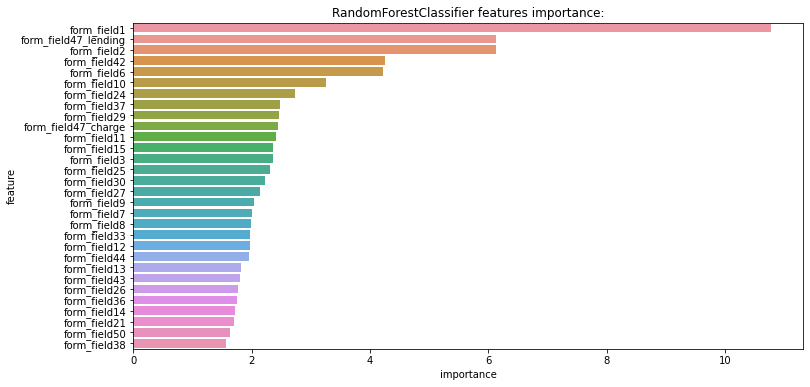

In [ ]:
feature_importance_df = pd.DataFrame(cat.feature_importances_, columns=['importance'])
feature_importance_df['feature'] = test_.columns

plt.figure(figsize=(12, 6));
sns.barplot(x="importance", y="feature", data=feature_importance_df.sort_values(by = ['importance'], ascending = False).head(30))
plt.title('RandomForestClassifier features importance:');

## Feature Engineering

In [ ]:
new_train.loc[new_train.form_field1>=3500,'form_field1']=1